In [4]:
# Standard library imports
import sys
import os
import time
import warnings

In [6]:
# Set the current directory and utilities path
current_dir = '/home/orincon/comparative-bem-pinns/main/analytical_solution'
utilities_dir = os.path.join(current_dir, '../../utilities')

# Change the working directory to the notebook's directory
os.chdir(current_dir)

# Modify the module search path to include utilities directory
sys.path.insert(0, utilities_dir)

In [10]:
%load_ext autoreload
%autoreload 2
#--------------------------------------------------------------
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#--------------------------------------------------------------
# Import Functions
from scat_circ import sound_hard_circle_calc 
from scat_circ import mask_displacement
from scat_circ import plot_exact_displacement
from scat_circ import plot_mesh_from_file
from scat_circ import measure_execution_time
from scat_circ import extract_fem_displacements
from scat_circ import plot_fem_displacements
from scat_circ import plot_pinns_displacements
from scat_circ import calculate_relative_errors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
r_i = np.pi/4 # Inner radius
l_se = np.pi # Outer semi-length
k = 3  # Wave number
n_grid = 501 # Number of grid points in x and y 

# Create a grid of points in the domain
Y, X = np.mgrid[-l_se:l_se:n_grid*1j, -l_se:l_se:n_grid*1j]

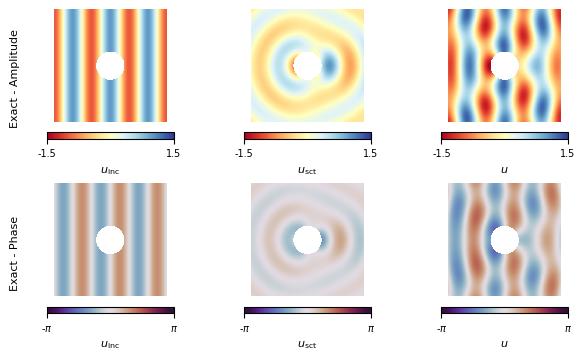

In [12]:
# Calculate the radial distance from the origin for each point in the grid
R_exact = np.sqrt(X**2 + Y**2)

# Calculate the displacement for a sound-hard circular obstacle
# n_terms: number of terms in the series expansion
u_inc_exact, u_scn_exact, u_exact = sound_hard_circle_calc(k, r_i, X, Y, n_terms=None)

# Mask the displacement
u_inc_exact = mask_displacement(R_exact, r_i, l_se, u_inc_exact)
u_scn_exact = mask_displacement(R_exact, r_i, l_se, u_scn_exact)
u_exact = mask_displacement(R_exact, r_i, l_se, u_exact)

# Plot the displacement amplitude
plot_exact_displacement(X, Y, np.real(u_inc_exact), np.real(u_scn_exact), np.real(u_exact), np.imag(u_inc_exact), np.imag(u_scn_exact), np.imag(u_exact))